# Prueba técnica para Sr Data Scientist en OPI Analitycs
### Presentada por Wilmar Sepulveda Herrera

## Parte A: Datos de delitos en ciudad de Mexico

In [54]:
## Cargo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Lectura del dataset
data_hurtos = pd.read_csv('data/data_hurtos.csv')

C:\Users\JUNIOR\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
print('Dimensiones del dataset:', data_hurtos.shape)
print('Filas con id unico',len(data_hurtos['_id'].unique()))
data_hurtos.head()

Dimensiones del dataset: (1168250, 20)
Filas con id unico 1168250


,_id,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,1,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01T00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01T00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN
2,3,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01T01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN
3,4,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01T02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633,NaN
4,5,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01T02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114,NaN


El conjunto de datos contiene la informacion de los hurtos, donde cada fila es unica para cada delito, analicemos que variables se tienen

In [12]:
print('Variables que contiene el dataset de hurtos')
data_hurtos.columns.tolist()

Variables que contiene el dataset de hurtos


['_id',
 'ao_hechos',
 'mes_hechos',
 'fecha_hechos',
 'ao_inicio',
 'mes_inicio',
 'fecha_inicio',
 'delito',
 'fiscalia',
 'agencia',
 'unidad_investigacion',
 'categoria_delito',
 'calle_hechos',
 'calle_hechos2',
 'colonia_hechos',
 'alcaldia_hechos',
 'competencia',
 'longitud',
 'latitud',
 'tempo']

Se tienen columnas que identifican la fecha, año y mes de los hechos, así como el tipo de delito, la fiscalía, la categoría del delito y la ubicación geografica del mismo identiificada por calle, latitud y longitud

### Calidad de datos
Para asegurarse de la calidad de datos, se deben tener buenas politicas en gobierno de datos, asegurarse que las bases de datos que alimentan la tabla tengan normas de calidad y estar en constante monitoreo de los delitos, procurar que todos los delitos sean registrados y no haya tergiversación en la información. Matematicamente se puede probar cosas como valores atipicos o valores faltantes en la data para asegurase un poco de estas inconsistencias, sin embargo la calidad en los datos en este caso depende más de la validez externa que se en la recolección de los mismos.

### Análisis de los tipos de delitos

In [28]:
print('año del primer hurto:',data_hurtos['ao_hechos'].min())
print('año del hurto mas reciente:',data_hurtos['ao_hechos'].max())
print('Tipos diferente de delitos:',len(data_hurtos['delito'].unique()))

año del primer hurto: 1906.0
año del hurto mas reciente: 2021.0
Tipos diferente de delitos: 341


En total se tienen 341 delitos diferentes medidos desde 1905 hasta 2021, un total de 116 años de hurtos registrados

In [31]:
data_hurtos['delito'].value_counts()

VIOLENCIA FAMILIAR                     116315
FRAUDE                                  70594
ROBO DE OBJETOS                         68924
ROBO A NEGOCIO SIN VIOLENCIA            65363
AMENAZAS                                61248
                                        ...  
CONTRA LA LEY GENERAL DE EXPLOSIVOS         1
ASOCIACION DELICTUOSA                       1
DESACATO                                    1
ROBO DE INFANTE                             1
SECUESTRO                                   1
Name: delito, Length: 341, dtype: int64

se tienen muchos delitos con baja ocurrencia por tanto vamos trabajarlos en una categoria llamada "otros delitos", vamos a suponer que si el delito tiene una ocurrencia de mas del 1% de las veces ya se considera frecuente y no sera tratado como otro delito, por el contrario si.

In [45]:
def find_frequent_labels(df, var, rare_perc):
    
    # function finds the labels that are shared by more than
    # a certain % of the houses in the dataset

    df = df.copy()

    tmp = df.groupby(var)[var].count() / len(df)

    return tmp[tmp > rare_perc].index

frequent_ls=find_frequent_labels(data_hurtos,'delito',0.01)
print('delitos mas frecuentes')
frequent_ls

delitos mas frecuentes


Index(['0TR0S', 'ABUSO DE CONFIANZA', 'ABUSO SEXUAL', 'AMENAZAS',
       'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL',
       'DAÑO EN PROPIEDAD AJENA INTENCIONAL', 'DENUNCIA DE HECHOS', 'DESPOJO',
       'FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO',
       'FRAUDE', 'LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION',
       'LESIONES INTENCIONALES POR GOLPES', 'NARCOMENUDEO POSESION SIMPLE',
       'ROBO A CASA HABITACION SIN VIOLENCIA', 'ROBO A NEGOCIO CON VIOLENCIA',
       'ROBO A NEGOCIO SIN VIOLENCIA',
       'ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA',
       'ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA',
       'ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA',
       'ROBO DE ACCESORIOS DE AUTO', 'ROBO DE OBJETOS',
       'ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO',
       'ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VIOLENCIA',
       'ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA',
       'USURPACIÓN D

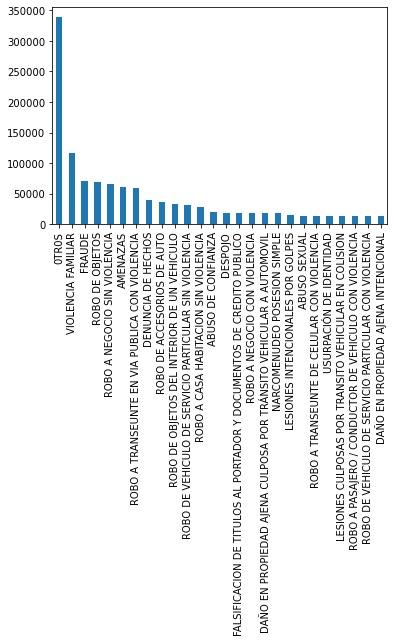

In [46]:
data_hurtos['delito'] = np.where(data_hurtos['delito'].isin(
        frequent_ls), data_hurtos['delito'], '0TR0S')

data_hurtos['delito'].value_counts().plot(kind='bar')

Se puede observar que la violencia intrafamiliar, el fraude y el robo de objetos han sido los delitos mas frecuentes en ciudad de mexico

In [53]:
data_hurtos_tendencia=data_hurtos.groupby(['ao_hechos','delito'])['_id'].count().reset_index()

In [55]:
data_hurtos_tendencia.head()

,ao_hechos,delito,_id
0,1906.0,VIOLENCIA FAMILIAR,1
1,1915.0,0TR0S,1
2,1915.0,FRAUDE,1
3,1930.0,ROBO DE OBJETOS,1
4,1942.0,VIOLENCIA FAMILIAR,1


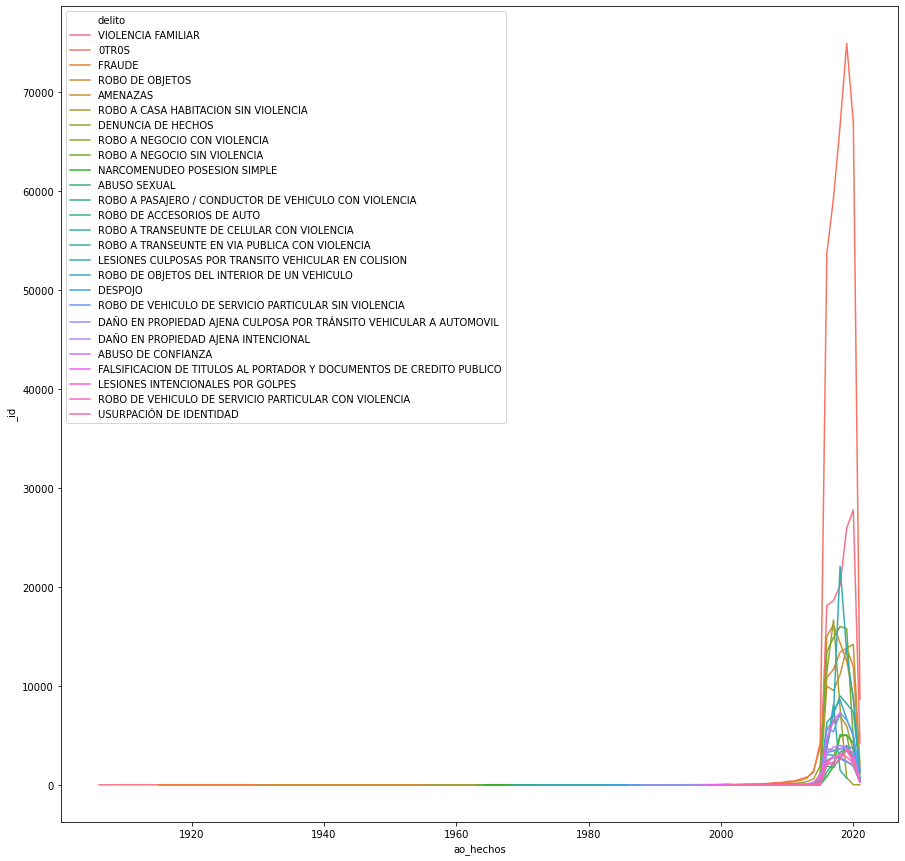

In [60]:
plt.figure(figsize=(15,15))
sns.lineplot(x='ao_hechos',y='_id',hue='delito',data=data_hurtos_tendencia)

El grafico no permite ver las frecuencuas con naturalidad pues antes del 2000 se presentaron muy poca ocurrencia de delitos, hagamos un poco de zoom

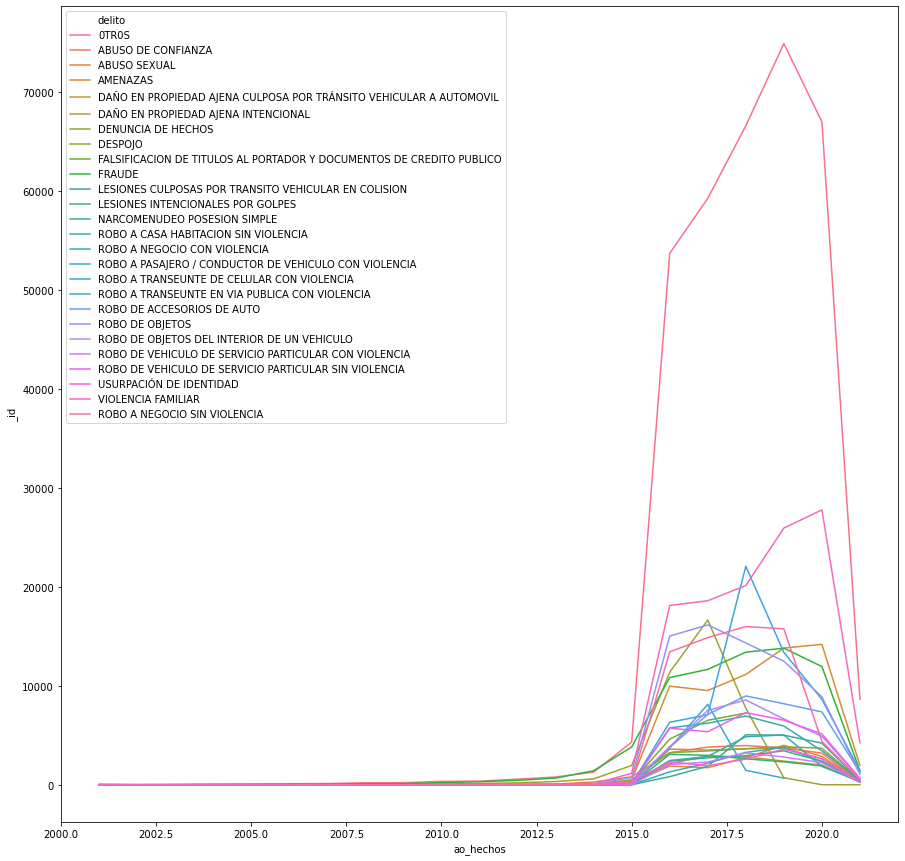

In [62]:
plt.figure(figsize=(15,15))
sns.lineplot(x='ao_hechos',y='_id',hue='delito',data=data_hurtos_tendencia[data_hurtos_tendencia['ao_hechos']>2000])

puede observarse como a partir del 2012 los delitos han venido aumentando, sin embargo algunos llegaron a un pico y luego comenzaron a disminuir

In [67]:
import plotly.express as px

#df = px.data.gapminder().query("continent=='Oceania'")
fig = px.line(data_hurtos_tendencia[data_hurtos_tendencia['ao_hechos']>2012], x='ao_hechos',y='_id',color='delito')
fig.show()

Practicamente a partir del 2019 todos los delitos han venido a la baja, tal vez la pandemia sea una de las causas principales o tal vez en ciudad de mexico se haya incrementado la seguridad en este periodo

### Analisis alcaldias

In [69]:
data_hurtos['alcaldia_hechos'].value_counts()

CUAUHTEMOC          182733
IZTAPALAPA          175731
GUSTAVO A MADERO    117084
BENITO JUAREZ        97738
ALVARO OBREGON       78940
                     ...  
MARIN                    1
ATITALAQUIA              1
OLUTA                    1
CIUDAD VALLES            1
PISAFLORES               1
Name: alcaldia_hechos, Length: 541, dtype: int64

Se puede observar que la alcaldía con mas delitos es la de CUAUHTEMOC seguida de la IZTAPALAPA, mientras que hay alcaldías que tienen solo un delito en todos estos años, como PAISAFLORES o CIUDAD VALLES, entre otras. Esto se puede deber a que las primeras son zonas mas pobladas en las que se cometen mas delitos o incluso son zonas con mayor inseguridad, se tendria que recurrir a un experto a una persona que conozca ciudad de Mexico para que nos ayude a dar conclusiones sobre este fenomeno

## Analisis de tendencias en la ocurrencia dedelitos
Como ya observamos a travez de los años, los delitos han venido incrementando, pero a partir de 2019 ha habido una baja, pero podemos tener preguntas cómo ¿hay un día de la semana donde se cometen más delitos?, ¿hay un mes del año donde se cometen mas delitos?, miremos esto

In [77]:
### Analisis mes
plt.figure(figsize=(15,5))
data_hurtos.groupby('mes_hechos')['_id'].count()

mes_hechos
Abril          88039
Agosto         98173
Diciembre      93205
Enero         108982
Febrero       105723
Julio          93439
Junio          91482
Marzo          99028
Mayo           94518
Noviembre      96682
Octubre       102462
Septiembre     96084
Name: _id, dtype: int64

<Figure size 1080x360 with 0 Axes>

Los meses de Enero, febrero y octubre es donde se presentan mayor cantidad de delitos, habris que plantear hipotesis sobre el por que de esta ocurrencia

In [130]:
import datetime

data_hurtos['fecha_hechos'].fillna('1900-01-31 22:16:00',inplace=True)

data_hurtos['dia_semana']=data_hurtos['fecha_hechos'].apply(lambda x: datetime.datetime.strptime(str(x[:10]),"%Y-%m-%d").date().strftime('%A'))

data_hurtos['dia_semana'].value_counts()

Friday       182187
Wednesday    175630
Monday       174414
Tuesday      173661
Thursday     172542
Saturday     152504
Sunday       137312
Name: dia_semana, dtype: int64

El dïa de la semana que mas delitos ocurren es el viernes, tal vez sepueda deber a factores psicologicos, como el cansancio mental de toda la semana, y el día que se cometen menos delitos es el domingo, el cual es el día de descanso

## delitos por alcaldía

In [133]:
data_hurtos_alcaldia=data_hurtos.groupby(['alcaldia_hechos','delito'])['_id'].count().reset_index()

In [134]:
data_hurtos_alcaldia

,alcaldia_hechos,delito,_id
0,ABALA,DENUNCIA DE HECHOS,1
1,ACAMBARO,0TR0S,1
2,ACAMBARO,VIOLENCIA FAMILIAR,1
3,ACAMBAY,0TR0S,1
4,ACAMBAY,ABUSO SEXUAL,1
...,...,...,...
2017,ZUMPANGO,LESIONES INTENCIONALES POR GOLPES,3
2018,ZUMPANGO,ROBO A CASA HABITACION SIN VIOLENCIA,1
2019,ZUMPANGO,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,1
2020,ZUMPANGO,USURPACIÓN DE IDENTIDAD,2


In [148]:
fig = px.bar(data_hurtos_alcaldia, y="delito", x="_id", color="alcaldia_hechos", title="Long-Form Input",orientation='h')

fig.update_layout(    font=dict(
        family="Courier New, monospace",
        size=10,
        color="RebeccaPurple"
    ))
fig.show()

Mediante este grafico dinamico se puede filtrar y ver qué delitos son mas comunes en las diferentes alcaldias, por ejemplo, la violencia familiar es mas comun en iztapalapa que en otras alcaldías, el fraude es mas comun en CUAUHTEMOC, con un poco más de tiempo se puede enriquecer este analisis con barras apiladas que me ayuden a conocer el delito mas frecuente dado que estoy en la ciudad X, y realizar un grafico de barras apilado al 100%

### Construcción de indice

para construir un indice de inseguridad, se puede crear para diferentes agregaciones, por ejmplo a nivel de alcaldía, si se quiere hacer de  forma descriptiva, se puede calcular dicho indice dividiendo el numero de robos en cada alcaldia por el numero total de robos. Tambien se pueden usar tecnicas de analisis multivariado como un analisis factorial multiple o un analisis de correspondencias multiples y utlizar los resultados de los ejes factoriales para construir dicho indice. El tiempo de la prueba no me alcanza para construirlo, pero puede hacerse de forma "sencilla"

## Parte B: Paletas la michoacana

Para iniciar con el abordaje de este problema, iniciaría con un buen análisis exploratorio de datos para conocer cual ha sido el comportamiento de las máquinas, entendiendo que se tiene la data por cada día de cada maquina, esto implica un histórico de 5 años de datos (asumamos que todas llevan el mismo tiempo en funcionamiento) para cada máquina, se puede iniciar entendiendo la serie de tiempo de unidades retiradas vs unidades disponibles en cada maquina y su relación con la capacidad de la misma. Se puede agrupar dicha información por mes y mostrar qué meses se retiran más unidades de cada maquina y por día de la semana, para saber cuáles días se retiran más unidades de las maquinas. Toda esta información de análitica descriptiva se puede mostrar en un tablero.

Una vez se conozcan a profundidad los datos, se puede proceder a diseñar una solución hay que tener en cuenta que hay un componente de aleatoriedad, pues bajo las mismas condiciones, no se puede pensar que sean retiradas (vendidas) el mismo numero de paletas, por tanto, yo haria una combinación entre métodos de clasificación, regresión y optimización. 

Primero tratemos de responder la pregunta ¿Cuando debo llenar la maquina?, sea:

* $y_{i,t}: $ el numero de paletas retiradas (vendidas) de la maquina en el tiempo $t$ para la maquina $i$
* $x_{i,t}:$ el numero de paletas disponibles en el tiempo $t$ para la maquina $i$

para $i=1,2,3..,n$, $t=1,2,3..., 1825 días$ (5 años)

La idea sería entrenar un modelo que nos permita estimar $\hat{y}_{t+1,i}$, es decir, el numero de paletas que seran retiraras de la maquina el día siguiente para cada maquina $i$, de modo que se debería llenar la maquina cuando $\hat{y}_{t+1,i} > x_{i,t}$ o en otras palabras, "cuando el pronostico de paletas vendidas para mañana, supere la cantidad de paletas que tiene la maquina hoy, se debe llenar la maquina". Para encontrar $\hat{y}_{t+1,i}$ se debe tener en cuenta que los algoritmos de machine learning requieren una medicion por maquina, en este caso se tienen mediciones repetidas en el tiempo para cada maquina, aparte que se tienen $n$ maquinas, por tanto se debe recurrir a los modelos estadísticos por ejmeplo un **modelo de datos de panel** o bien un **modelo mixto generalizado** podría ayudarnos a resolver este problema. Con esto, Luis podria darse una mejor idea basado en los datos sobre cuando llenar cada una de sus maquinas.


Ahora debemos trabajar en saber para cada maquina, con qué cantidad de paletas se debe llenar una vez nuestro método anterior nos diga que se debe llenar, de modo que los costos se mantengan al mínimo, teniendo en cuenta que cada maquina tiene una capacidad diferente y por cuestiones de costos, no es viable llenarla por completo pero tampoco llenarla todos los días con una cierta cantidad. Para ello se debe realizar un método de optimizacion que tenga en cuenta las restricciones que tiene luis.

Esta solución funcionaría en dos etapas, primero se determina la cantidad de paletas a llenar en cada maquina, para posteriormente obtener estimaciones día a día de cual maquina debe ser llenada con la cantidad propuesta por el modelo de optimización, teniendo así una sinergia entre el modelo predictivo y el deterministico.

Dado que la solucion tiene elementos de modelos mixtos deben tenerse en cuenta los supuestos de dichos modelos estadísticos sobre los errores, además de una estimacion de la matriz de varianzas y covarianzas debe ser considerada, para evaluar la calidad en los pronosticos se pueden hacer pruebas backtesting y conocer el comportamiento de las mismas basado en una métrica, por ejemplo, el Error Cuadratico Medio (ECM).

Una vez el modelo cumpla con todos los supuestos y tenga buenos resultados prediciendo las unidades a ser llenadas se procede a llevarlo a producción, realizando acciones como escritura de codigo para producción, pasar todo lo hecho en la etapa de investigación (en formato .ipynp de jupyter noteboolk) a un script mas limpio escrito de forma funcional y que pueda ser ejecutado por consola (en formato .py), se puede crear una API o usar AWS para automatizar estos scripts y que se corra el modelo estimado de forma diaria enviando los resultado a una base de datos que pueda ser consultada por Luis y le permita ver (mediante un tablero, puede ser) cuales maquinas debe surtir en el día y con qué cantidad de paletas, lo que facilitaría su trabajo y lo haria de una forma más objetiva basada en datos, en comparación como lo venia haciendo.

Para finalizar, la forma de evaluar este modelo es mirando un antes y un despues, si la cantidad de maquinas que se quedan sin paletas disminuye y si los costos de transporte disminuye, definiendo unos KPI, significa que el modelo esta dando resultados favorables y puede seguirse implementando.




